# Plot measures

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import scipy.stats as st


## REMEMBER!

In the folder `Plot_metrics/` create a new subfolder: `Plot_metrics/{folder_name}/`

For each model you create you need to save a individual file.

E.g. if your model is a XGBoost model call the file Plot_metrics/{folder_name}/"XGBoost_gender.csv"

The file should have this specific columns:

	| Gender | TPR | FPR | TNR | FNR |   Model |
1	   Male    0.7   0.2    0.6   0.8  "XGBoost"

2	  Female   0.7   0.2    0.6   0.8  "XGBoost"


E.g. if your model is a FFNN model call the file Plot_metrics/{folder_name}/"FFNN_gender.csv"

The file should have this specific columns:

	| Gender | TPR | FPR | TNR | FNR |   Model |
1	   Male    0.7   0.2    0.6   0.8  "FFNN"

2	  Female   0.7   0.2    0.6   0.8  "FFNN"



## Folder to save the plots

In [62]:
folder_name="dummy"

In [63]:
PATH=f"Plot_metrics/{folder_name}/"

## read data

In [70]:
data_gender_FFNN=pd.read_csv(PATH+"FFNN_gender.csv")
data_gender_Xgboost=pd.read_csv(PATH+"Xgboost_gender.csv")
data_gender_SVM=pd.read_csv(PATH+"SVM_gender.csv")
data_gender_RF=pd.read_csv(PATH+"RF_gender.csv")
data_gender_LR=pd.read_csv(PATH+"LR_gender.csv")

In [71]:
all_data_gender=pd.concat([
    data_gender_FFNN,
    data_gender_Xgboost,
    data_gender_SVM,
    data_gender_RF,
    data_gender_LR
],sort=False,axis=0
).drop(columns=["Unnamed: 0"])

## melt data

In [73]:
all_data_gender=all_data_gender.melt(id_vars=["Gender","Model"],var_name="Metric",value_name="Value")

## Convert binary gender to string.

In [74]:
#Use this outcommented code if the gender is binary encoded
#all_data_gender["Gender_string"]=all_data_gender["Gender"].apply(lambda x: "Female" if x==0 else "Male")
all_data_gender["Gender_string"]=all_data_gender["Gender"].apply(lambda x: "Female" if x=="Female" else "Male")

## Create plot

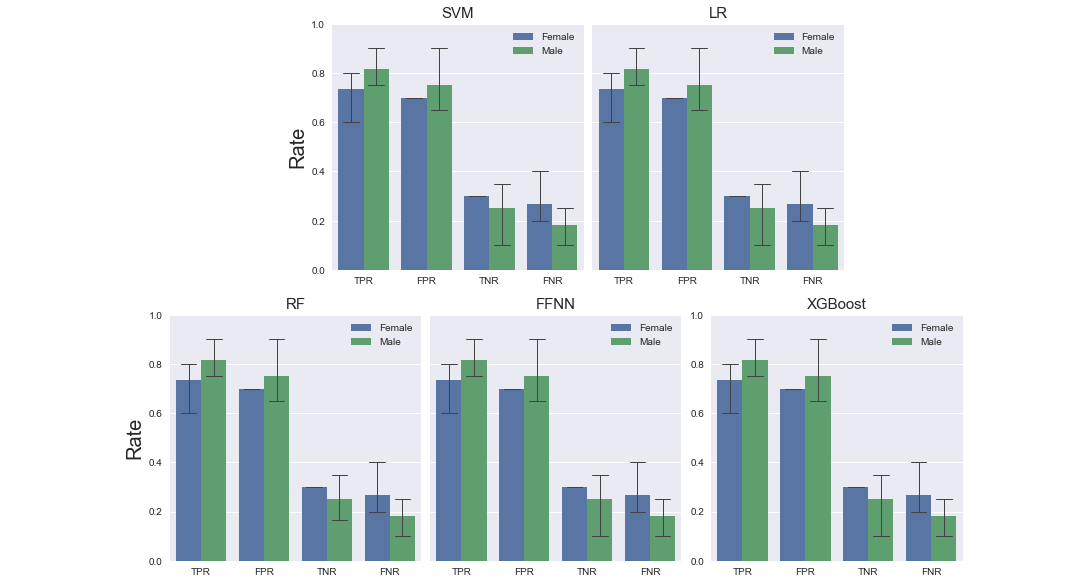

In [78]:
fig = plt.figure(constrained_layout=True,figsize=(15,8))

gs = plt.GridSpec(2, 8, figure=fig)
gs.update(wspace=0.5)

ax=[]

ax.append( fig.add_subplot(gs[0, 2:4]))
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax.append( fig.add_subplot(gs[0, 4:6]))
ax.append(fig.add_subplot(gs[1, 1:3]))
ax.append(fig.add_subplot(gs[1, 3:5]))
ax.append( fig.add_subplot(gs[1, 5:7]))


palette_custom ={"Female": "C0", "Male": "C1"}
gender_order=["Female","Male"]
list_of_models=["SVM","LR","RF","FFNN","XGBoost"]

for i,v in enumerate(list_of_models):
    
    filter1=all_data_gender["Model"]==v
    
    ax[i].set_title(v,size=15)
    ax[i].set_ylim([0, 1])
    ax[i].grid(axis='x')
    sns.barplot(data=all_data_gender[(filter1)],x="Metric",y="Value",hue="Gender_string",ax=ax[i],errwidth=1,capsize=0.25,palette=palette_custom,hue_order=gender_order)
    
    ax[i].legend(title="Gender")
    ax[i].legend( loc="upper right")
    if i==0:
        ax[i].set(xlabel='')
        ax[i].set_ylabel("Rate",fontsize=20)
    if i==1:
        ax[i].set(xlabel='',ylabel='')
        ax[i].tick_params( labelleft=False)
    if i==2:
        ax[i].set_ylabel("Rate",fontsize=20)
        ax[i].set_xlabel("",fontsize=20)
        
    if i==3:
        ax[i].set(ylabel='')
        ax[i].set_xlabel("",fontsize=20)
        ax[i].tick_params( labelleft=False)
    if i==4:
        ax[i].set_ylabel('',fontsize=20)
        ax[i].set_xlabel("",fontsize=20)


plt.savefig(f"Plots/{folder_name}/{folder_name}_gender_metrics_allmodels", bbox_inches = 'tight')
plt.show()

## Calcuate relation between male/female

In [76]:
frame=all_data_gender
newFrame=pd.DataFrame([],columns=["Model","Metric","Abs Difference","Relation","Relative difference (%)"])

for i in list(frame["Model"].unique()):
    for j in list(frame["Metric"].unique()) :
        if j not in ["Mean_y_target","Mean_y_hat_prob"]:
            female_val=frame[(frame["Model"]==i)&(frame["Metric"]==j)&(frame["Gender_string"]=="Female")]["Value"].mean()
            male_val=frame[(frame["Model"]==i)&(frame["Metric"]==j)&(frame["Gender_string"]=="Male")]["Value"].mean()
            absdiff=abs(female_val-male_val)

            mini=min(female_val,male_val)
            maxi=max(female_val,male_val)
            reldiff=((maxi-mini)/mini)*100

            relation=female_val/male_val

            newFrame=newFrame.append({"Model":i,"Metric":j,"Abs Difference":absdiff,"Relation":relation,"Relative difference (%)":reldiff},ignore_index=True)

## Plot relation

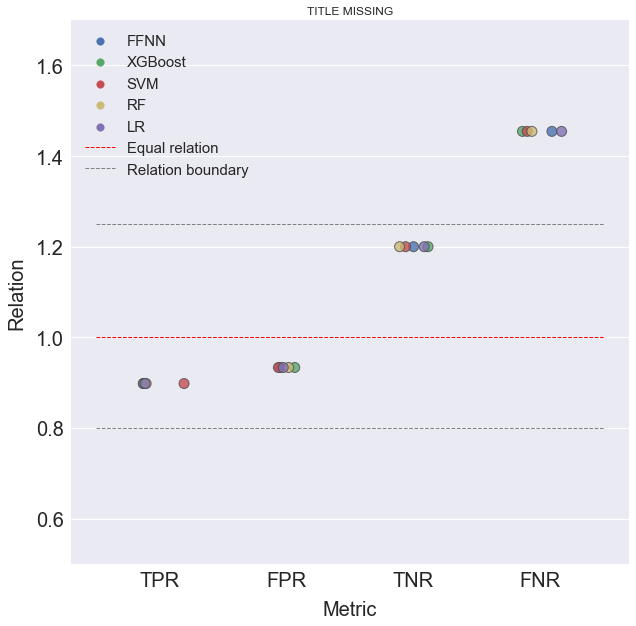

In [77]:
plt.figure(figsize=(10,10)) 

sns.stripplot(data=newFrame,x="Metric",y="Relation",hue="Model",jitter=0.2,size=10,alpha=0.8,linewidth=1,
             palette={"FFNN":"C0","XGBoost":"C1","SVM":"C2","LR":"C3","RF":"C4"}             
             )

plt.hlines(y=1, xmin=-0.5, xmax=3.5, colors='red', linestyles='--', lw=1, label='Equal relation')
plt.hlines(y=0.8, xmin=-0.5, xmax=3.5, colors='grey', linestyles='--', lw=1, label='Relation boundary')
plt.hlines(y=1.25, xmin=-0.5, xmax=3.5, colors='grey', linestyles='--', lw=1)#, label='Relative difference=0.8')

plt.legend( loc="upper left")
plt.legend(loc=2, prop={'size': 15})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel( "Metric",fontsize=20,labelpad=10)
plt.ylabel( "Relation",fontsize=20,labelpad=10)
plt.yticks(np.arange(0.6,1.7 , step=0.2))
plt.ylim([0.5,1.7])



if folder_name=="original":
    plt.title("Original Data",fontsize=20)
else:
    plt.title("TITLE MISSING")

plt.savefig(f"plots/{folder_name}/Difference_gender_{folder_name}_relation.png", bbox_inches = 'tight')
    

plt.show()